All Permutations coverage

In [12]:
import itertools
import json

# Load the scenarios from the JSON file
with open('user_input/scenarios.json') as f:
    scenarios = json.load(f)

# Define the possible values for each variable
weather = ['Sunny', 'Rain', 'Thunderstorm']
vehicle = ['Small', 'Truck','Van']
traffic = ['Heavy', 'Light','Medium']
emergency = ['Yes', 'No']
timeOfDay = ['Day', 'Night','Dawn','Dusk']
location = ['Urban', 'Country','Downtown']
intersections = [0,1,2,3,4]
pedestrians = [True,False]
pedestrian_cross = [True, False]
route_length = [100,200,300]

# Generate all possible permutations of the variables
variables = [weather, vehicle, traffic, emergency, timeOfDay, location, intersections, pedestrians, pedestrian_cross,route_length]
permutations = list(itertools.product(*variables))

# Check how well the scenarios cover the permutations
covered_permutations = set()

for scenario in scenarios:
    # Construct a tuple of the variable values for the scenario
    scenario_values = (scenario['weather'],  scenario['vehicle'], scenario['traffic'], scenario['emergency'], scenario['timeOfDay'], 
                       scenario['location'], scenario['intersections'], 
                       scenario['pedestrians'], scenario['pedestrian_cross'],scenario['route_length'])
    # Add the permutation to the set of covered permutations
    covered_permutations.add(scenario_values)

# Compute the coverage percentagescenario['road'],
coverage = len(covered_permutations) / len(permutations) * 100

# Print the coverage and number of unique scenarios
print("Coverage: {:.2f}%".format(coverage))
print("Number of possible permutations: {}".format(len(permutations)))

# Check for duplicates
hashable_scenarios = set()
num_duplicates = 0

for scenario in scenarios:
    # Convert the scenario to a hashable object
    hashable_scenario = tuple(sorted(scenario.items()))
    
    if hashable_scenario in hashable_scenarios:
        num_duplicates += 1
    else:
        hashable_scenarios.add(hashable_scenario)

# Print the percentage of scenarios that are duplicates
if len(scenarios) > 0:
    duplicate_percentage = num_duplicates / len(scenarios) * 100
    print("Percentage of duplicate scenarios: {:.2f}%".format(duplicate_percentage))
else:
    print("No scenarios found.")

Coverage: 0.02%
Number of possible permutations: 38880
Percentage of duplicate scenarios: 0.00%


In [13]:
import itertools
import json

# Load the scenarios from the JSON file
with open('user_input/scenarios.json') as f:
    scenarios = json.load(f)

# Define the possible values for each variable
weather = ['Sunny', 'Rain', 'Thunderstorm']
vehicle = ['Small', 'Truck','Van']
traffic = ['Heavy', 'Light','Medium']
emergency = ['Yes', 'No']
timeOfDay = ['Day', 'Night','Dawn','Dusk']
location = ['Urban', 'Country','Downtown']
intersections = [0,1,2,3,4]
pedestrians = [True,False]
pedestrian_cross = [True, False]
route_length = [100,200,300]


# Generate all possible permutations of the variables
variables = [weather, vehicle, traffic, emergency, timeOfDay, location, intersections, pedestrians, pedestrian_cross,route_length]
permutations = list(itertools.product(*variables))

# Check how well the scenarios cover the permutations
covered_permutations = set()
duplicates = set()

for scenario in scenarios:
    # Construct a tuple of the variable values for the scenario
    scenario_values = (scenario['weather'],  scenario['vehicle'], scenario['traffic'], scenario['emergency'], scenario['timeOfDay'], 
                       scenario['location'], scenario['intersections'], 
                       scenario['pedestrians'], scenario['pedestrian_cross'],scenario['route_length'])
    if scenario_values in covered_permutations:
        duplicates.add(scenario_values)
    else:
        # Add the permutation to the set of covered permutations
        covered_permutations.add(scenario_values)

# Compute the coverage percentage
coverage = len(covered_permutations) / len(permutations) * 100

print("Coverage: {:.2f}%".format(coverage))

# Print the number of unique scenarios
print("Unique scenarios: {}".format(len(scenarios) - len(duplicates)))

# Compute the percentage of duplicate scenarios
duplicate_percentage = len(duplicates) / len(scenarios) * 100
print("Percentage of duplicates: {:.2f}%".format(duplicate_percentage))

# Print out any duplicate scenarios
# if len(duplicates) > 0:
#     print("Duplicate scenarios:")
#     for scenario_values in duplicates:
#         scenario = {
#             'weather': scenario_values[0],
#             'road': scenario_values[1],
#             'vehicle': scenario_values[2],
#             'traffic': scenario_values[3],
#             'emergency': scenario_values[4],
#             'timeOfDay': scenario_values[5],
#             'location': scenario_values[6],
#             'num_cars': scenario_values[7],
#             'intersection': scenario_values[8],
#             'pedestrians': scenario_values[9],
#             'pedestrian_cross': scenario_values[10]
#         }
#         print(scenario)


Coverage: 0.02%
Unique scenarios: 7
Percentage of duplicates: 0.00%


To plot how combinations of variables were covered,  create a heatmap with the possible values of each variable on the x and y axes, and color each cell based on the number of times that combination of values appears in the scenarios. Use the seaborn library to create the heatmap.

This code generates a heatmap with the counts of scenarios for each combination of weather and road type. 
Modify the code to include more variables by adding more columns to the counts dataframe and changing the index and columns arguments in the pd.DataFrame function.

<AxesSubplot: >

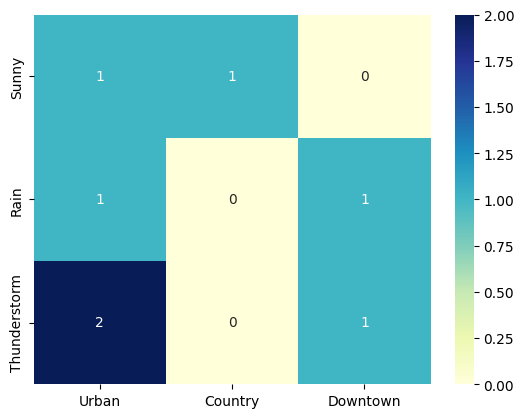

In [15]:
import seaborn as sns
import pandas as pd


import itertools
import json

# Load the scenarios from the JSON file
with open('user_input/scenarios.json') as f:
    scenarios = json.load(f)

# Define the possible values for each variable
weather = ['Sunny', 'Rain', 'Thunderstorm']
vehicle = ['Small', 'Truck','Van']
traffic = ['Heavy', 'Light','Medium']
emergency = ['Yes', 'No']
timeOfDay = ['Day', 'Night','Dawn','Dusk']
location = ['Urban', 'Country','Downtown']
intersections = [0,1,2,3,4]
pedestrians = [True,False]
pedestrian_cross = [True, False]
route_length = [100,200,300]

# Create a dataframe with the count of each combination of variable values
counts = pd.DataFrame(0, index=weather, columns=location)
for scenario in scenarios:
    counts.loc[scenario['weather'], scenario['location']] += 1

# Plot the heatmap
sns.heatmap(counts, annot=True, cmap="YlGnBu")


Testing Pymoo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


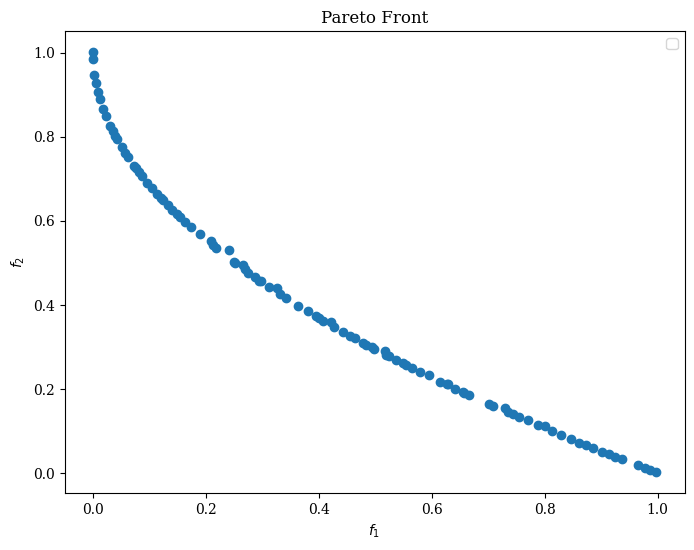

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# define the problem
problem = get_problem("zdt1")

# define the optimization algorithm
algorithm = NSGA2()

# run the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               verbose=False)

# plot the final Pareto front
plot = Scatter(title="Pareto Front", legend=True)
plot.add(res.F)
plot.show()


sklearn.multioutput.MultiOutputRegressor